In [88]:
import os

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [89]:
data = pd.read_csv('data_norm2.csv')
data

agegroup    AL1  EducationG  eye  filter_$  Height  p1_digitalscreenH  \
0          6.0  22.39         0.0  1.0         1   105.0               0.50   
1          6.0  22.41         0.0  2.0         1   105.0               0.50   
2          6.0  22.88         1.0  2.0         1   108.1               1.56   
3          6.0  22.94         1.0  1.0         1   108.1               1.56   
4          6.0  22.83         0.0  2.0         1   108.2               2.31   
...        ...    ...         ...  ...       ...     ...                ...   
7436      12.0  23.46         1.0  1.0         1   171.4               0.21   
7437      12.0  23.65         0.0  2.0         1   171.5               2.00   
7438      12.0  23.75         0.0  1.0         1   171.5               2.00   
7439      12.0  23.63         1.0  2.0         1   172.3               2.57   
7440      12.0  23.53         1.0  1.0         1   172.3               2.57   

      p1_digitalscreenTVH  p1_outdoorH  p1_readingwritingH  ...  agegroup2  \
0                    1.50         0.00                0.88  ...        1.0   
1                    1.50         0.00                0.88  ...        1.0   
2                    2.99         2.93                1.07  ...        1.0   
3                    2.99         2.93                1.07  ...        1.0   
4                    2.31         1.79                1.07  ...        1.0   
...                   ...          ...                 ...  ...        ...   
7436                 1.64         1.43                1.00  ...        3.0   
7437                 3.00         6.21                0.86  ...        3.0   
7438                 3.00         6.21                0.86  ...        3.0   
7439                 4.57         1.99                0.89  ...        3.0   
7440                 4.57         1.99                0.89  ...        3.0   

       AgeY  SEg  Sex  TVdistance_m  myopiabaselinegroups  Basline_AL_Binned  \
0      6.90  0.0    2             4                   0.0                1.0   
1      6.90  1.0    2             4                   1.0                1.0   
2      6.84  0.0    1             3                   0.0                2.0   
3      6.84  0.0    1             3                   0.0                2.0   
4      6.43  1.0    1             2                   1.0                2.0   
...     ...  ...  ...           ...                   ...                ...   
7436  12.64  1.0    2             2                   1.0                3.0   
7437  12.38  1.0    1             1                   1.0                4.0   
7438  12.38  1.0    1             1                   1.0                4.0   
7439  12.78  1.0    1             3                   1.0                4.0   
7440  12.78  1.0    1             3                   1.0                4.0   

      SEgroupsbaselinenew  risksMLV  risksSEP  
0                     0.0         0         0  
1                     1.0         0         0  
2                     0.0         0         0  
3                     0.0         0         0  
4                     1.0         0         0  
...                   ...       ...       ...  
7436                  1.0         0         0  
7437                  1.0         0         0  
7438                  1.0         0         0  
7439                  1.0         0         0  
7440                  1.0         0         0  

[7441 rows x 27 columns]

In [90]:
target = data['risksSEP']
#target = data['risksMLV']
target.value_counts()

0    7277
1     164
Name: risksSEP, dtype: int64

In [91]:
X = data.iloc[:,:-2]
#X = data.dropna(subset=['AL_quartiles', 'Myopialastcat'], inplace=True)
X.shape

(7441, 25)

In [92]:
y=target #decision class
y.value_counts()

0    7277
1     164
Name: risksSEP, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=0)

BASELINE
imbalanced data


In [94]:
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer


gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True)
scores = cross_validate(LogisticRegression(max_iter=5000),
                        X_train, y_train, cv=5, scoring={'roc_auc':'roc_auc', 'average_precision':'average_precision','accuracy':'accuracy','f1':'f1','gmean':gm_scorer})

print('Test roc: ',scores['test_roc_auc'].mean()) 
print('Test accuracy: ', scores['test_accuracy'].mean())
print('Test f1: ', scores['test_f1'].mean())
print('Test g mean: ', scores['test_gmean'].mean())

Test roc:  0.8767872909893276
Test accuracy:  0.9781362007168457
Test f1:  0.13317972350230414
Test g mean:  0.25056932160234285


In [95]:
model = LogisticRegression(max_iter=8000)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

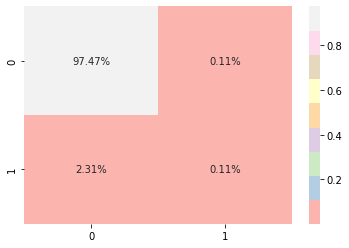

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = cf_matrix = confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Pastel1')

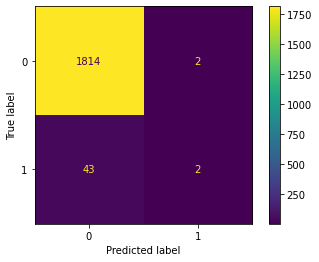

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,prediction,cmap='viridis')

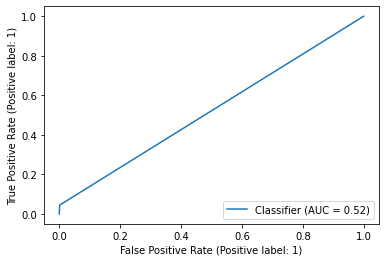

In [98]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,prediction)

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

print('Roc score: ',roc_auc_score(y_test,prediction)) 
print('Accuracy score: ',  accuracy_score(y_test,prediction))
print('f1 score: ',f1_score(y_test,prediction))
print('G mean score: ',  geometric_mean_score(y_test,prediction))

Roc score:  0.5216715614292707
Accuracy score:  0.9758194519075766
f1 score:  0.0816326530612245
G mean score:  0.21070238920905554


UNDERSAMPLE

In [100]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
undersample_pipe = make_imb_pipeline(RandomUnderSampler(random_state=42) ,LogisticRegression(max_iter=5000))
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=5, scoring={'roc_auc':'roc_auc', 'average_precision':'average_precision','accuracy':'accuracy','f1':'f1','gmean':gm_scorer})
print('Test roc: ',scores['test_roc_auc'].mean()) 
print('Test accuracy: ', scores['test_accuracy'].mean())
print('Test f1: ', scores['test_f1'].mean())
print('Test g mean: ', scores['test_gmean'].mean())

Test roc:  0.8814577988508434
Test accuracy:  0.7919354838709677
Test f1:  0.14639953009792572
Test g mean:  0.8111251706623477


In [101]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline

undersample_pipe.fit(X_train, y_train)
prediction = undersample_pipe.predict(X_test)
y_test.shape

(1861,)

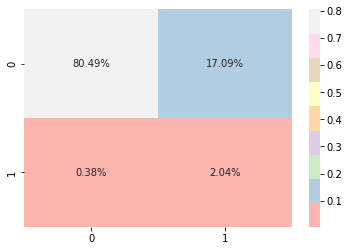

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = cf_matrix = confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Pastel1')

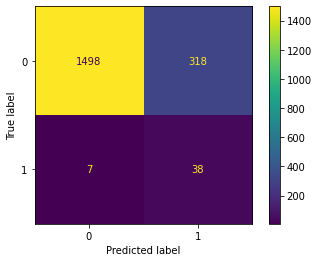

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,prediction,cmap='viridis')

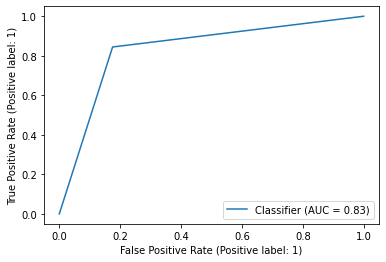

In [104]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,prediction)

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
print('Roc score: ',roc_auc_score(y_test,prediction)) 
print('Accuracy score: ',  accuracy_score(y_test,prediction))
print('f1 score: ',f1_score(y_test,prediction))
print('G mean score: ',  geometric_mean_score(y_test,prediction))

Roc score:  0.8346671561429271
Accuracy score:  0.8253627082213864
f1 score:  0.18952618453865333
G mean score:  0.8346098886169456


OVERSAMPLE

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
oversample_pipe = make_imb_pipeline(SMOTE(random_state=42), LogisticRegression(max_iter=5000))
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=5, scoring={'roc_auc':'roc_auc', 'average_precision':'average_precision','accuracy':'accuracy','f1':'f1','gmean':gm_scorer})
print('Test roc: ',scores['test_roc_auc'].mean()) 
print('Test accuracy: ', scores['test_accuracy'].mean())
print('Test f1: ', scores['test_f1'].mean())
print('Test g mean: ', scores['test_gmean'].mean())

Test roc:  0.8951748528486864
Test accuracy:  0.8740143369175627
Test f1:  0.2044744575663871
Test g mean:  0.8139754143506067


In [107]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
oversample_pipe.fit(X_train,y_train)
prediction = oversample_pipe.predict(X_test)



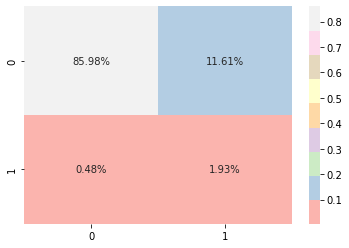

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = cf_matrix = confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Pastel1')

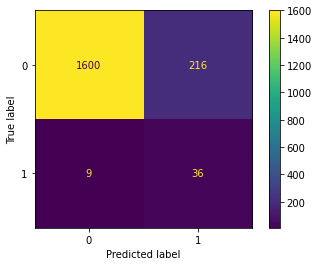

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,prediction,cmap='viridis')

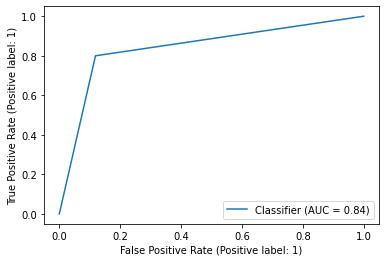

In [110]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,prediction)

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

print('Roc score: ',roc_auc_score(y_test,prediction)) 
print('Accuracy score: ',  accuracy_score(y_test,prediction))
print('f1 score: ',f1_score(y_test,prediction))
print('G mean score: ',  geometric_mean_score(y_test,prediction))

Roc score:  0.8405286343612335
Accuracy score:  0.8790972595378829
f1 score:  0.24242424242424243
G mean score:  0.839550960322227


SMOTETomek

In [112]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
over_undersample_pipe = make_imb_pipeline(SMOTETomek(random_state=42), LogisticRegression(max_iter=5000))
scores = cross_validate(over_undersample_pipe,
                        X_train, y_train, cv=5, scoring={'roc_auc':'roc_auc', 'average_precision':'average_precision','accuracy':'accuracy','f1':'f1','gmean':gm_scorer})
print('Test roc: ',scores['test_roc_auc'].mean()) 
print('Test accuracy: ', scores['test_accuracy'].mean())
print('Test f1: ', scores['test_f1'].mean())
print('Test g mean: ', scores['test_gmean'].mean())

Test roc:  0.8951748528486864
Test accuracy:  0.8740143369175627
Test f1:  0.2044744575663871
Test g mean:  0.8139754143506067


In [113]:
over_undersample_pipe.fit(X_train,y_train)
prediction = over_undersample_pipe.predict(X_test)

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

print('Roc score: ',roc_auc_score(y_test,prediction)) 
print('Accuracy score: ',  accuracy_score(y_test,prediction))
print('f1 score: ',f1_score(y_test,prediction))
print('G mean score: ',  geometric_mean_score(y_test,prediction))

Roc score:  0.8405286343612335
Accuracy score:  0.8790972595378829
f1 score:  0.24242424242424243
G mean score:  0.839550960322227


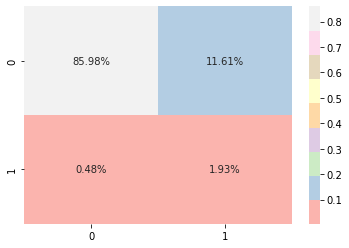

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = cf_matrix = confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Pastel1')

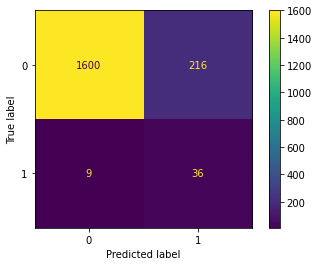

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction,cmap='viridis')

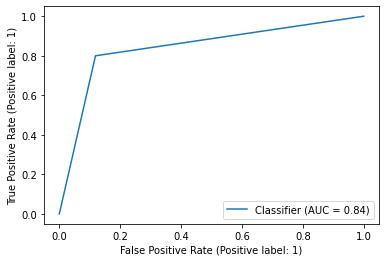

In [117]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,prediction)

In [118]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components=12)

In [119]:
new_train = model_pca.fit_transform(X_train)
new_test = model_pca.fit_transform(X_test)

In [120]:
new_model = LogisticRegression()

In [121]:
new_model.fit(new_train, y_train)

LogisticRegression()

In [122]:
predict_train_pca = new_model.predict(new_train)

In [123]:
predict_test_pca = new_model.predict(new_test)

In [124]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=.90)
pca.fit(X)
print("Variance explained by the principal components (in decrising order): ", pca.explained_variance_ratio_)
X1 = pca.transform(X)
print("Shape of transformed X : ", X1.shape)

Variance explained by the principal components (in decrising order):  [0.21764138 0.13485623 0.11982868 0.07645726 0.06841567 0.05096271
 0.04500212 0.04135184 0.04020125 0.04002362 0.0386388  0.03433675]
Shape of transformed X :  (7441, 12)


In [133]:
import plotly.express as px



pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data['risksSEP'])
fig.show()

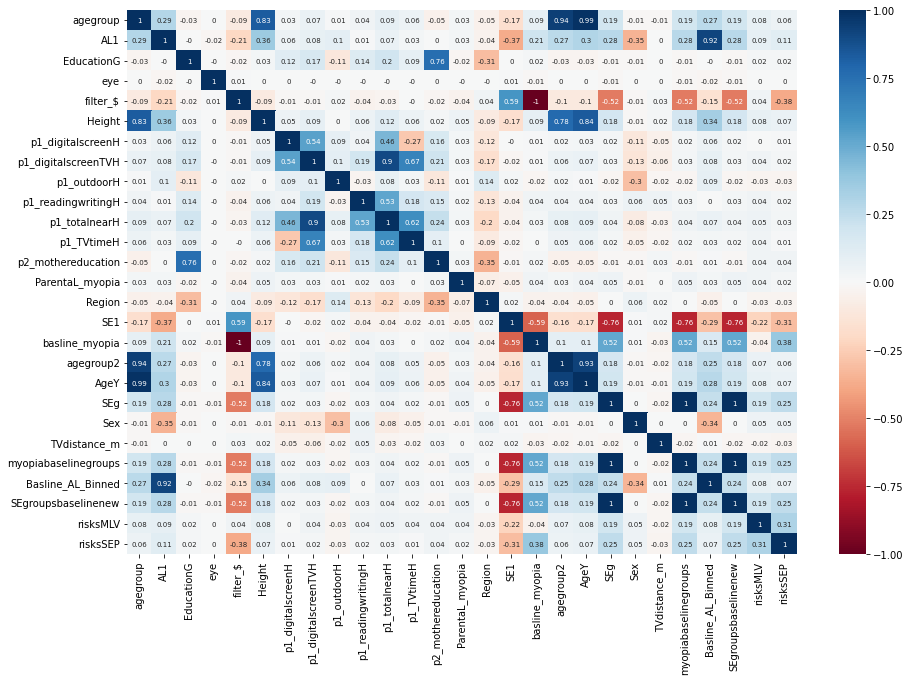

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(round(correlations,2),cmap='RdBu',annot=True,annot_kws={'size':7},vmin=-1,vmax=1)

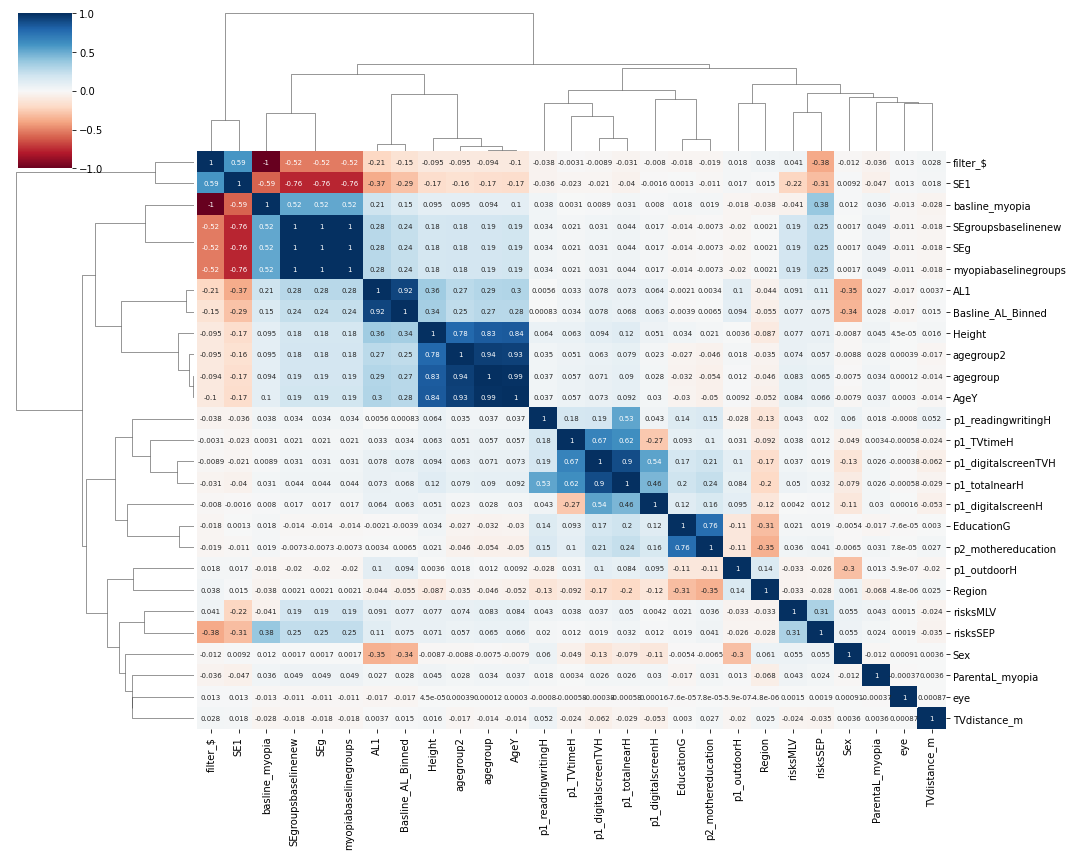

In [141]:
sns.clustermap(correlations,method='complete',cmap='RdBu',annot=True,annot_kws={'size':7},vmin=-1,vmax=1,figsize=(15,12))

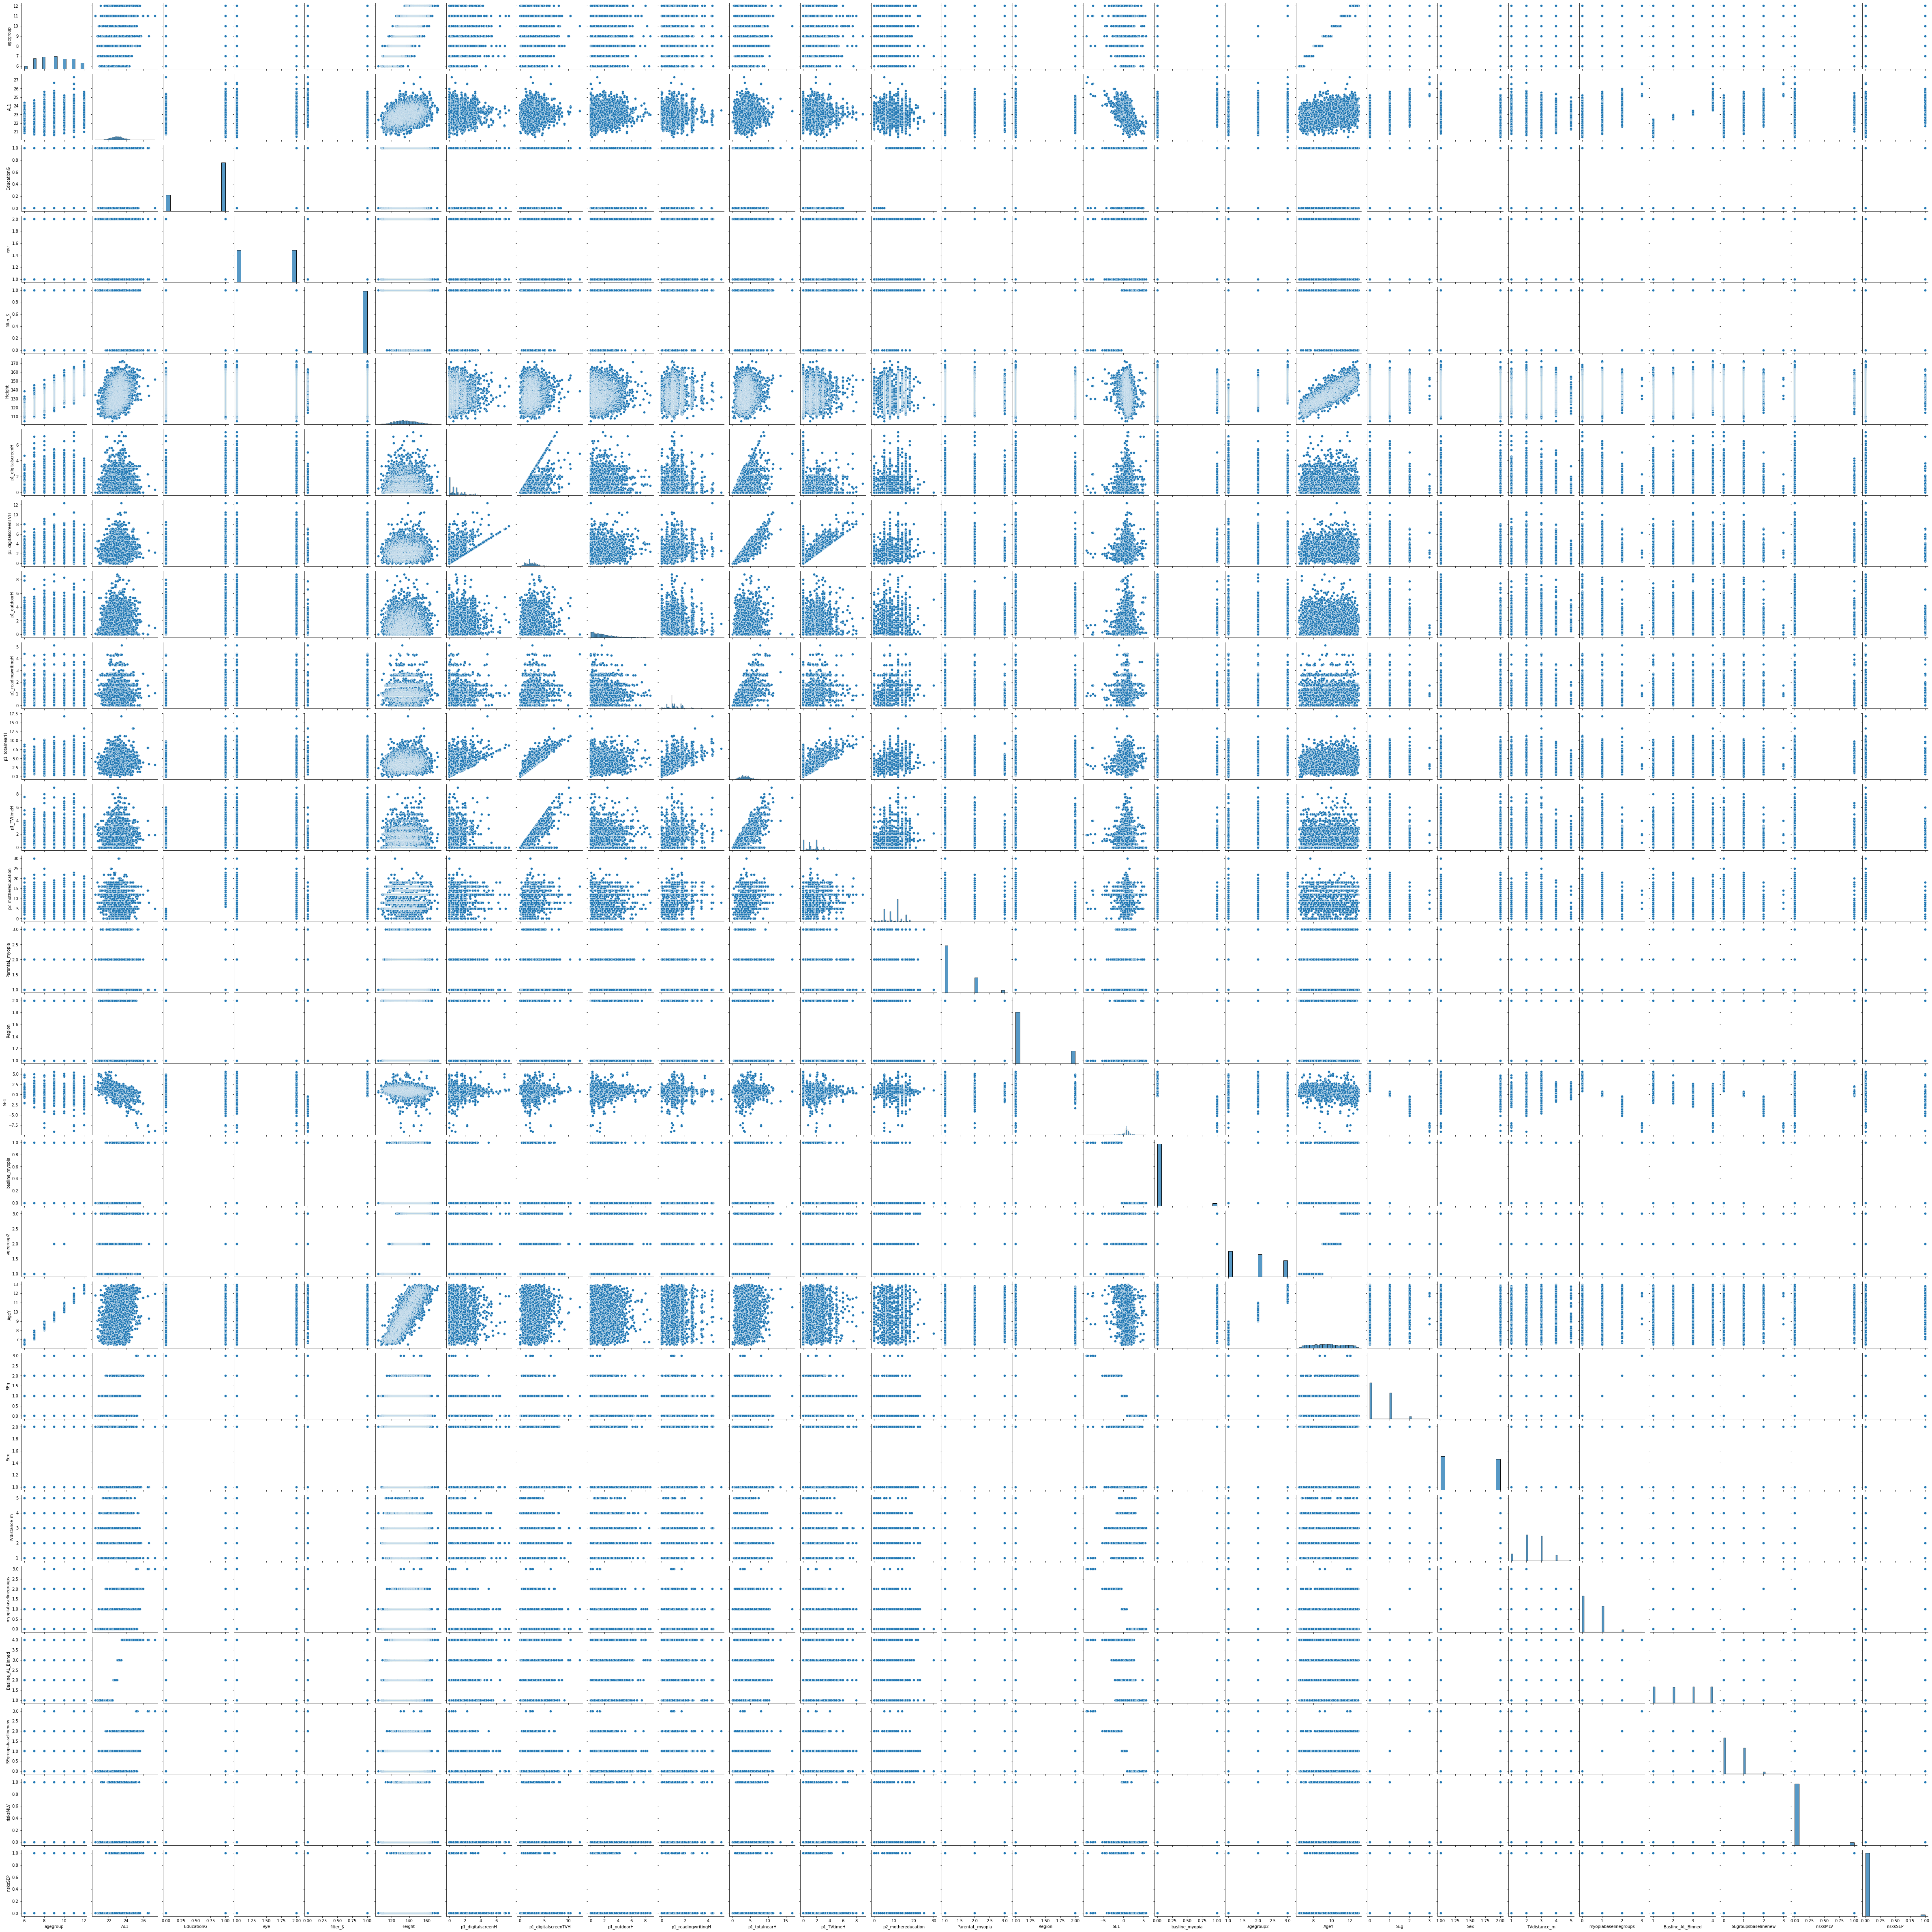

In [144]:
sns.pairplot(data)

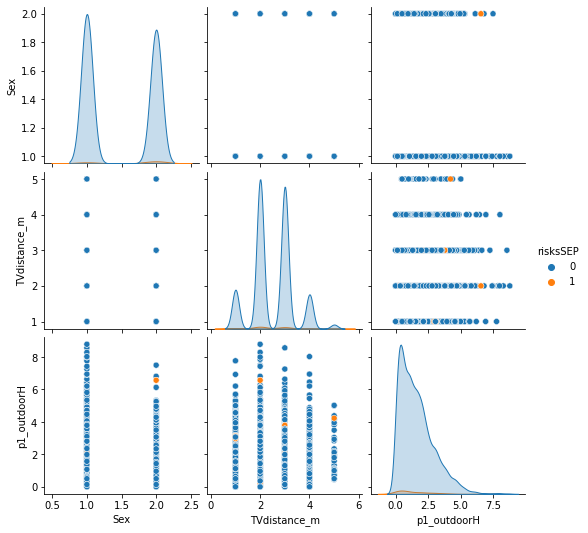

In [151]:
sns.pairplot(data, vars = ['Sex', 'TVdistance_m', 'p1_outdoorH'], hue = "risksSEP")

In [126]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
over_undersample_pipe = make_imb_pipeline(SMOTE(random_state=42),TomekLinks(), LogisticRegression(max_iter=5000))
scores = cross_validate(over_undersample_pipe,
                        X_train, y_train, cv=5, scoring={'roc_auc':'roc_auc', 'average_precision':'average_precision','accuracy':'accuracy','f1':'f1','gmean':gm_scorer})
print('Test roc: ',scores['test_roc_auc'].mean()) 
print('Test accuracy: ', scores['test_accuracy'].mean())
print('Test f1: ', scores['test_f1'].mean())
print('Test g mean: ', scores['test_gmean'].mean())

Test roc:  0.8951748528486864
Test accuracy:  0.8740143369175627
Test f1:  0.2044744575663871
Test g mean:  0.8139754143506067


In [127]:
over_undersample_pipe.fit(X_train,y_train)
prediction = over_undersample_pipe.predict(X_test)

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score

print('Roc score: ',roc_auc_score(y_test,prediction)) 
print('Accuracy score: ',  accuracy_score(y_test,prediction))
print('f1 score: ',f1_score(y_test,prediction))
print('G mean score: ',  geometric_mean_score(y_test,prediction))

Roc score:  0.8405286343612335
Accuracy score:  0.8790972595378829
f1 score:  0.24242424242424243
G mean score:  0.839550960322227


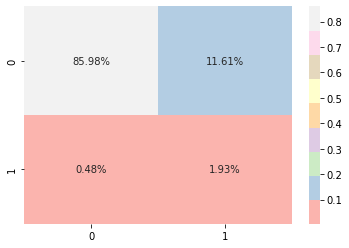

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = cf_matrix = confusion_matrix(y_test,prediction)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Pastel1')

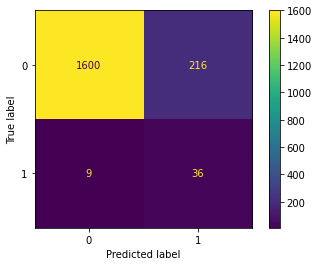

In [130]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction,cmap='viridis')

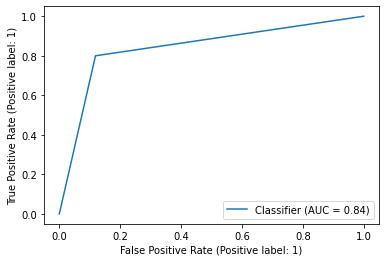

In [131]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,prediction)